In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [52]:
data = pd.read_csv("HV.csv")

Features and Target variables

In [53]:
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# HV and LCV
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W']].values

target = data['SD'].values

Normalize data

In [54]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [56]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [57]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
3/3 [==============================] - 2s 176ms/step - loss: 470.9849 - val_loss: 513.3278
Epoch 2/800
3/3 [==============================] - 0s 18ms/step - loss: 470.0277 - val_loss: 512.2369
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 469.0285 - val_loss: 510.9219
Epoch 4/800
3/3 [==============================] - 0s 17ms/step - loss: 467.7693 - val_loss: 509.3098
Epoch 5/800
3/3 [==============================] - 0s 15ms/step - loss: 466.3204 - val_loss: 507.3210
Epoch 6/800
3/3 [==============================] - 0s 16ms/step - loss: 464.3958 - val_loss: 504.8270
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 462.0050 - val_loss: 501.6038
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 459.0791 - val_loss: 497.3650
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 454.8109 - val_loss: 491.6859
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 449.7360

Visualize LSTM results

0.6679220600901954


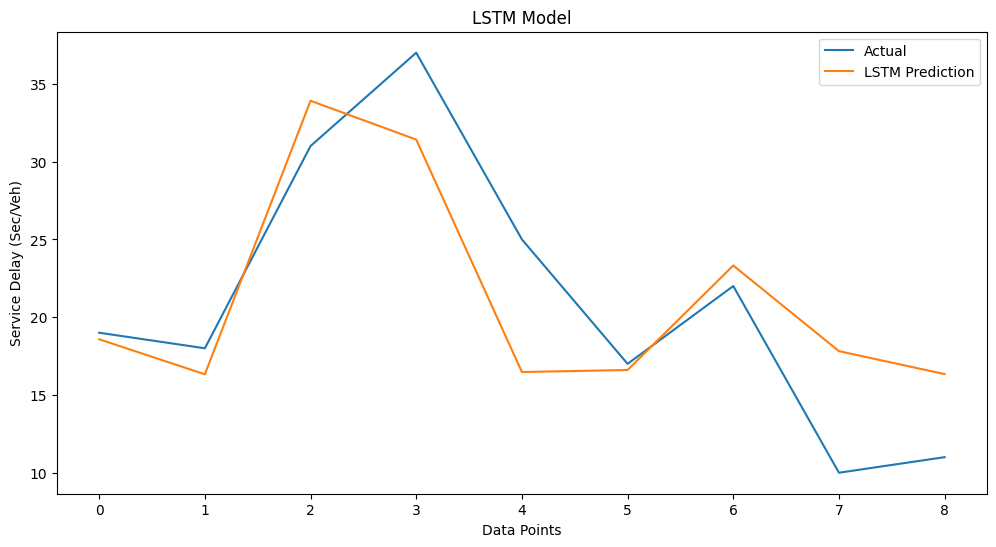

In [58]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [97]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/600
2/2 [==============================] - 3s 360ms/step - loss: 471.4875 - val_loss: 513.4819
Epoch 2/600
2/2 [==============================] - 0s 28ms/step - loss: 470.3223 - val_loss: 512.2644
Epoch 3/600
2/2 [==============================] - 0s 33ms/step - loss: 469.2199 - val_loss: 510.9768
Epoch 4/600
2/2 [==============================] - 0s 34ms/step - loss: 468.0463 - val_loss: 509.5070
Epoch 5/600
2/2 [==============================] - 0s 27ms/step - loss: 466.6459 - val_loss: 507.7601
Epoch 6/600
2/2 [==============================] - 0s 33ms/step - loss: 465.0219 - val_loss: 505.6337
Epoch 7/600
2/2 [==============================] - 0s 33ms/step - loss: 463.0469 - val_loss: 503.0311
Epoch 8/600
2/2 [==============================] - 0s 26ms/step - loss: 460.6931 - val_loss: 499.8282
Epoch 9/600
2/2 [==============================] - 0s 30ms/step - loss: 457.7251 - val_loss: 495.8599
Epoch 10/600
2/2 [==============================] - 0s 28ms/step - loss: 454.0065

Visualize BiLSTM results

0.6172721353883568


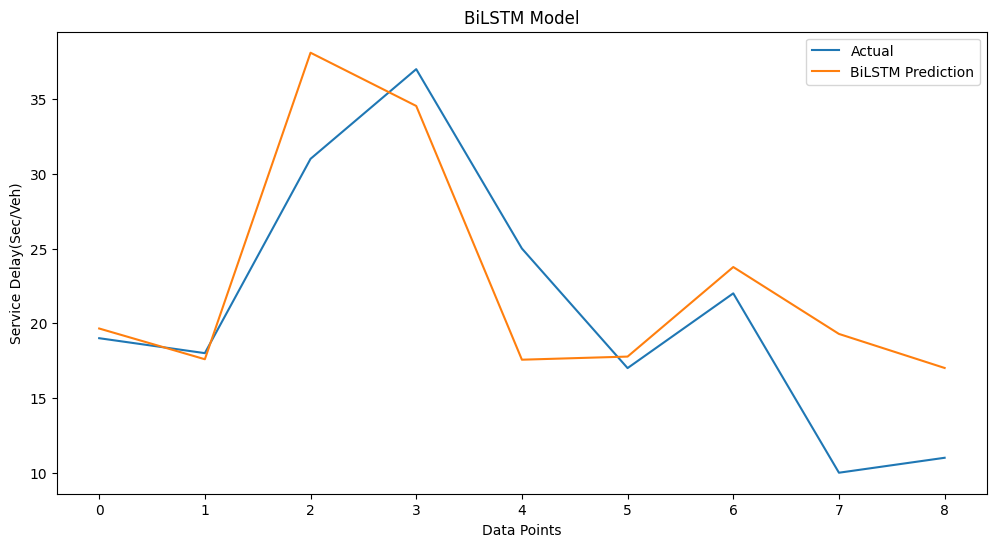

In [98]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [61]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
3/3 [==============================] - 2s 141ms/step - loss: 471.2379 - val_loss: 511.9862
Epoch 2/800
3/3 [==============================] - 0s 15ms/step - loss: 468.4913 - val_loss: 509.1430
Epoch 3/800
3/3 [==============================] - 0s 14ms/step - loss: 465.7718 - val_loss: 506.0423
Epoch 4/800
3/3 [==============================] - 0s 21ms/step - loss: 462.9134 - val_loss: 502.4385
Epoch 5/800
3/3 [==============================] - 0s 10ms/step - loss: 459.5162 - val_loss: 498.1009
Epoch 6/800
3/3 [==============================] - 0s 20ms/step - loss: 455.4768 - val_loss: 492.7658
Epoch 7/800
3/3 [==============================] - 0s 11ms/step - loss: 450.2377 - val_loss: 485.9459
Epoch 8/800
3/3 [==============================] - 0s 19ms/step - loss: 443.7130 - val_loss: 476.8843
Epoch 9/800
3/3 [==============================] - 0s 13ms/step - loss: 434.9406 - val_loss: 464.6245
Epoch 10/800
3/3 [==============================] - 0s 14ms/step - loss: 422.6493

Visualize GRU results

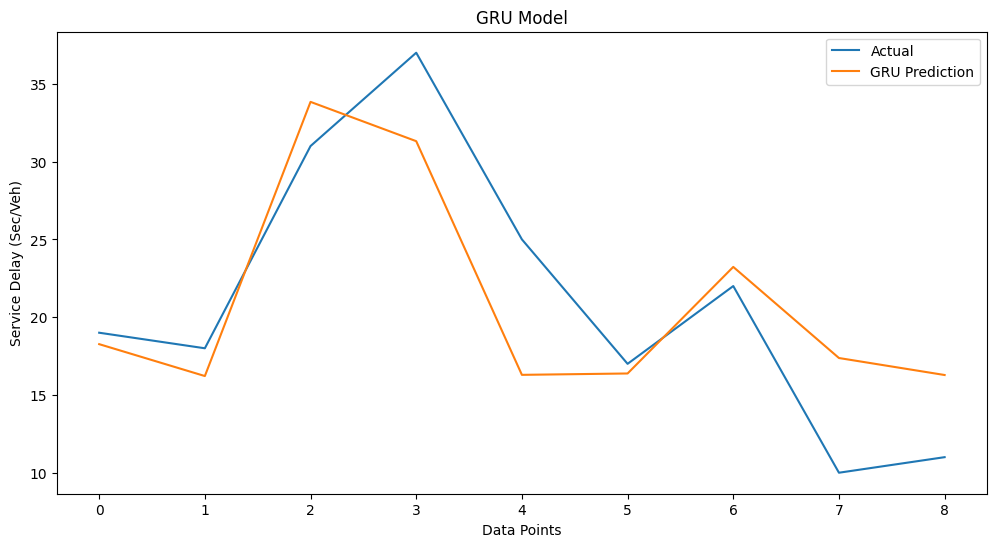

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [63]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
3/3 [==============================] - 4s 230ms/step - loss: 471.1470 - val_loss: 511.6955
Epoch 2/800
3/3 [==============================] - 0s 38ms/step - loss: 468.0966 - val_loss: 508.2300
Epoch 3/800
3/3 [==============================] - 0s 17ms/step - loss: 464.7390 - val_loss: 503.8826
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 460.7315 - val_loss: 498.1444
Epoch 5/800
3/3 [==============================] - 0s 16ms/step - loss: 454.8849 - val_loss: 490.6002
Epoch 6/800
3/3 [==============================] - 0s 16ms/step - loss: 447.6002 - val_loss: 480.5153
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 437.4095 - val_loss: 466.8272
Epoch 8/800
3/3 [==============================] - 0s 23ms/step - loss: 424.2305 - val_loss: 447.8725
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 405.4807 - val_loss: 421.3868
Epoch 10/800
3/3 [==============================] - 0s 20ms/step - loss: 379.5324

Visualize BiGRU results

0.6255556999893952


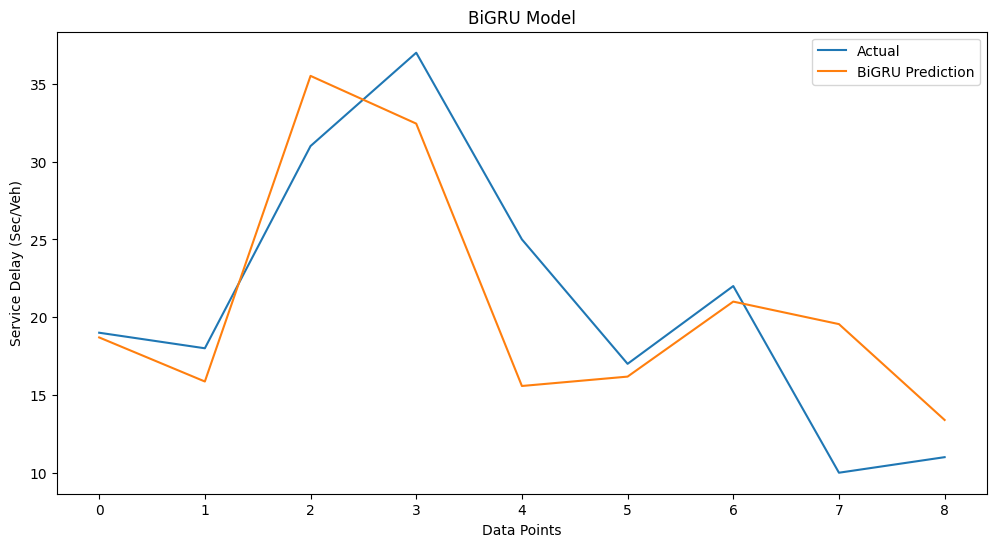

In [64]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [65]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
3/3 [==============================] - 1s 71ms/step - loss: 469.9153 - val_loss: 507.3209
Epoch 2/800
3/3 [==============================] - 0s 16ms/step - loss: 463.9762 - val_loss: 500.3445
Epoch 3/800
3/3 [==============================] - 0s 8ms/step - loss: 457.5729 - val_loss: 492.5769
Epoch 4/800
3/3 [==============================] - 0s 31ms/step - loss: 450.5682 - val_loss: 483.6634
Epoch 5/800
3/3 [==============================] - 0s 23ms/step - loss: 442.4385 - val_loss: 474.0555
Epoch 6/800
3/3 [==============================] - 0s 16ms/step - loss: 433.7898 - val_loss: 463.1561
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 423.6195 - val_loss: 450.4399
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 412.4004 - val_loss: 435.7280
Epoch 9/800
3/3 [==============================] - 0s 13ms/step - loss: 398.8531 - val_loss: 419.0641
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 383.4956 -

Visualize CNN results

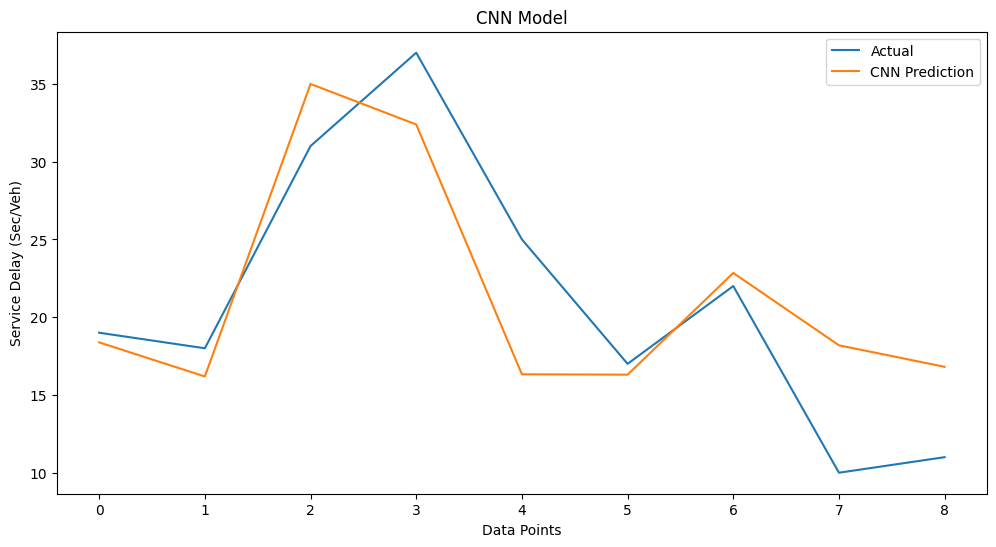

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [67]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
3/3 [==============================] - 2s 110ms/step - loss: 471.6888 - val_loss: 513.8679
Epoch 2/800
3/3 [==============================] - 0s 23ms/step - loss: 470.5663 - val_loss: 512.4525
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 469.2909 - val_loss: 510.8607
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 467.7595 - val_loss: 509.0028
Epoch 5/800
3/3 [==============================] - 0s 16ms/step - loss: 465.9534 - val_loss: 506.7663
Epoch 6/800
3/3 [==============================] - 0s 13ms/step - loss: 464.0505 - val_loss: 504.0410
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 461.4498 - val_loss: 500.6350
Epoch 8/800
3/3 [==============================] - 0s 13ms/step - loss: 458.3535 - val_loss: 496.3475
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 454.5015 - val_loss: 490.9859
Epoch 10/800
3/3 [==============================] - 0s 8ms/step - loss: 449.4154 

Visualize CNN_LSTM results

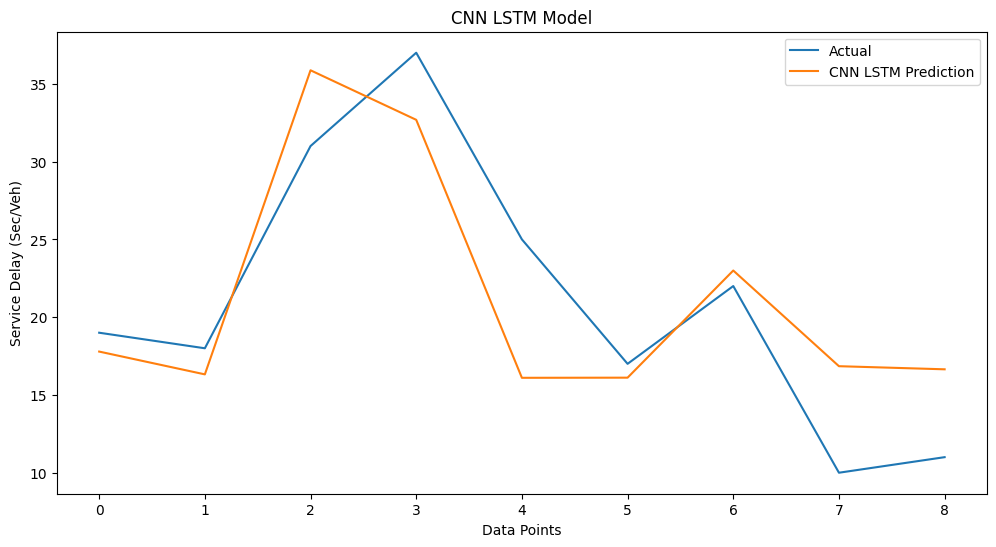

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [69]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
3/3 [==============================] - 2s 170ms/step - loss: 471.6240 - val_loss: 513.2388
Epoch 2/800
3/3 [==============================] - 0s 19ms/step - loss: 469.7382 - val_loss: 511.0109
Epoch 3/800
3/3 [==============================] - 0s 17ms/step - loss: 467.7953 - val_loss: 508.5281
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 465.4648 - val_loss: 505.6561
Epoch 5/800
3/3 [==============================] - 0s 17ms/step - loss: 462.9016 - val_loss: 502.1907
Epoch 6/800
3/3 [==============================] - 0s 16ms/step - loss: 459.7238 - val_loss: 497.9341
Epoch 7/800
3/3 [==============================] - 0s 25ms/step - loss: 455.7085 - val_loss: 492.5055
Epoch 8/800
3/3 [==============================] - 0s 23ms/step - loss: 450.7538 - val_loss: 485.4835
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 444.4599 - val_loss: 476.4279
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 435.6053

Visualize CNN_BiLSTM results

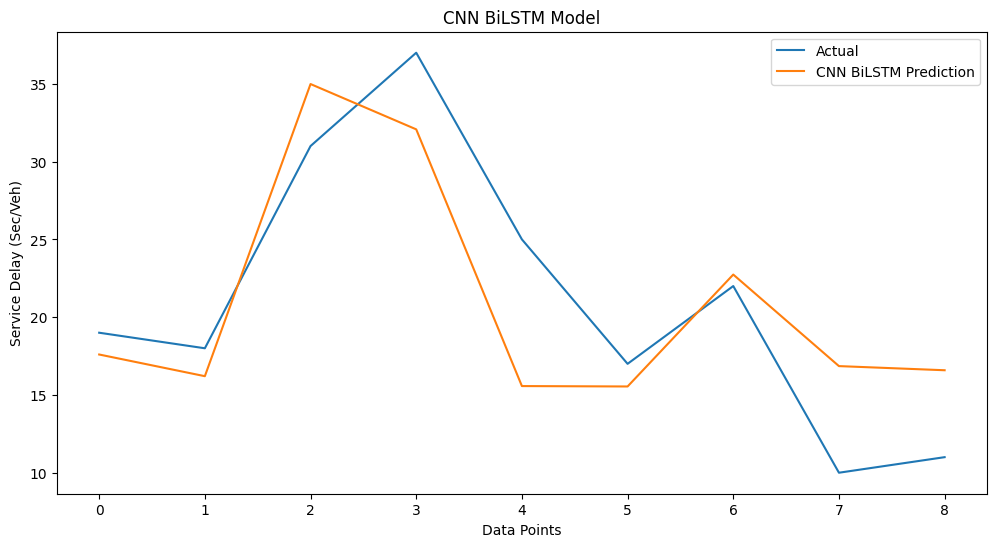

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [80]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

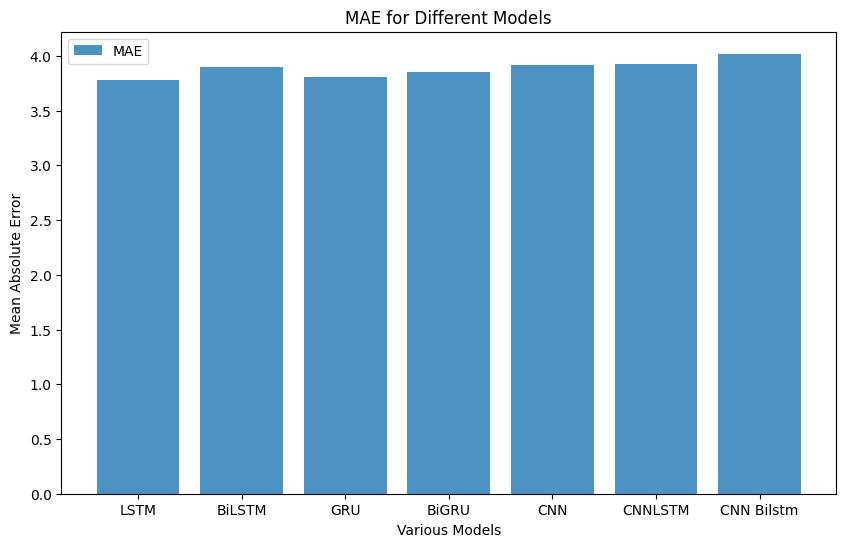

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

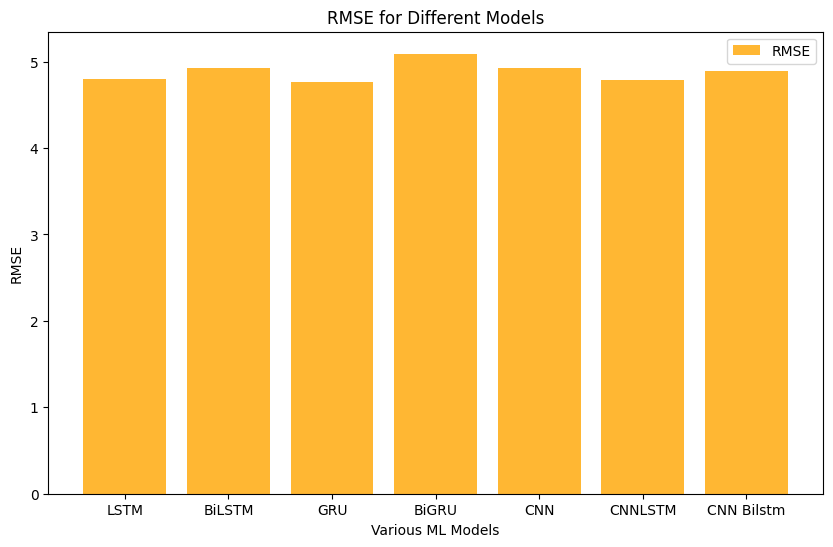

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

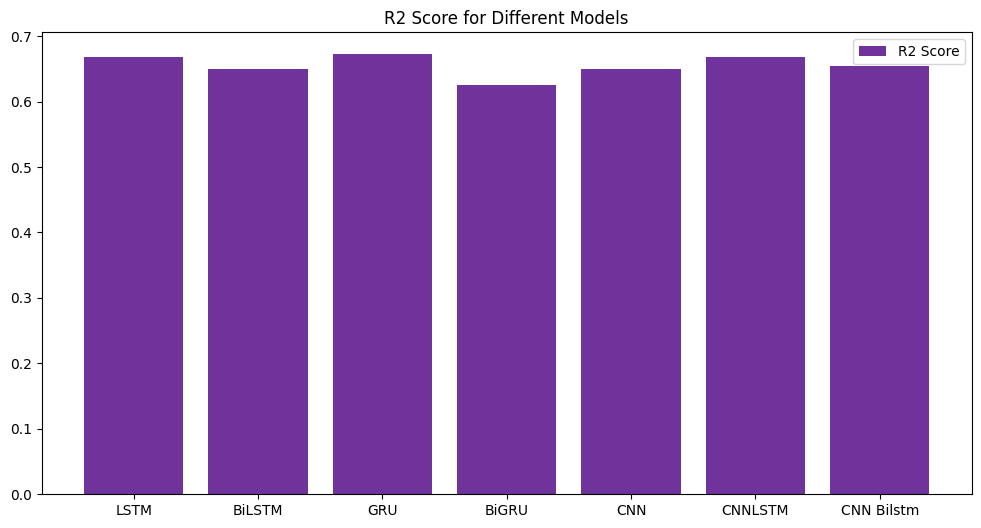

In [83]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [84]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.776955074734158
LSTM MSE: 4.794066460102639
LSTM R2 Score: 0.6679220600901954

BiLSTM MAE: 3.9014871385362415
BiLSTM MSE: 4.924178005142757
BiLSTM R2 Score: 0.6496521849566771

GRU MAE: 3.8067213694254556
GRU MSE: 4.7623860524031905
GRU R2 Score: 0.6722964691612414

BiGRU MAE: 3.8550908830430775
BiGRU MSE: 5.090701697805774
BiGRU R2 Score: 0.6255556999893952

CNN MAE: 3.9164352416992188
CNN MSE: 4.922962159241985
CNN R2 Score: 0.6498251747899376

CNN LSTM MAE: 3.928421232435438
CNN LSTM MSE: 4.788611688134535
CNN LSTM R2 Score: 0.6686773182520811

CNN BiLSTM MAE: 4.019130388895671
CNN BiLSTM MSE: 4.888943688037369
CNN BiLSTM R2 Score: 0.6546479840940358


Plot predictions for each model

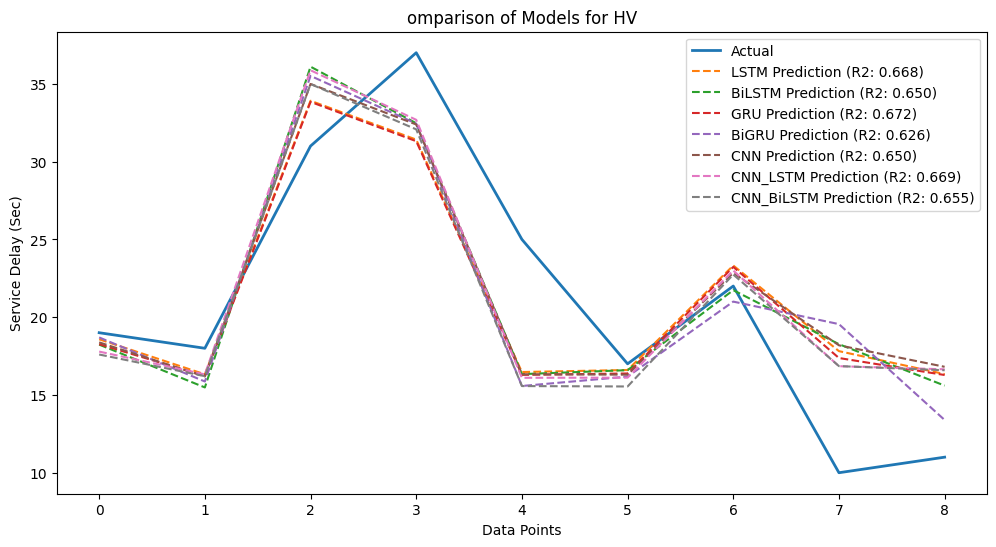

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('omparison of Models for HV')
plt.show()

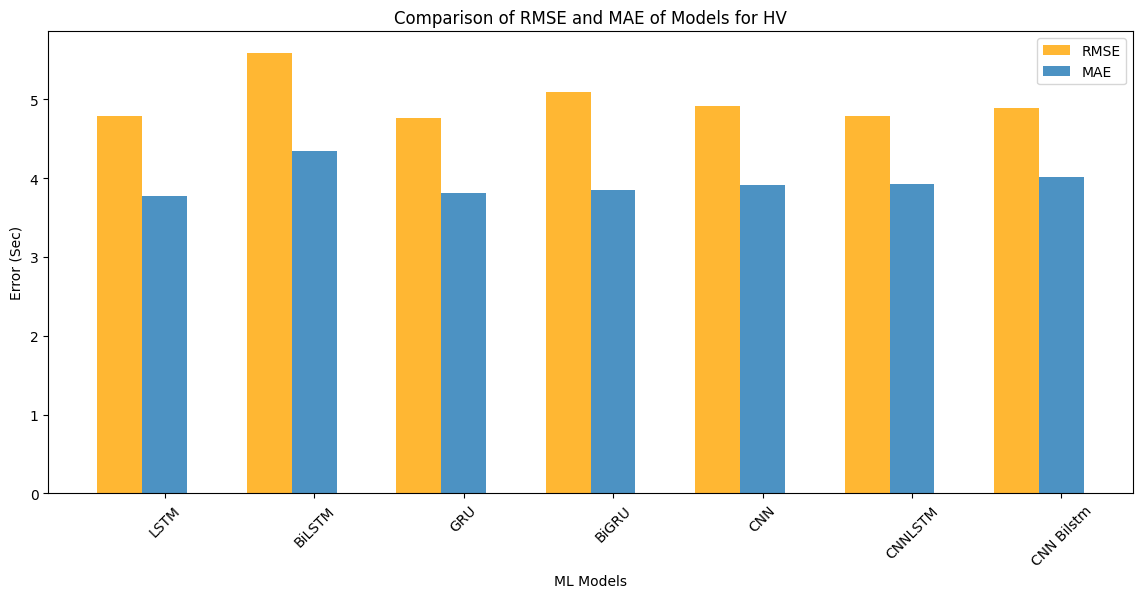

In [77]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for HV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()